In [1]:
from init_nb import init_notebook
config = init_notebook()

from pathlib import Path
from bold_dementia.data.study import balance_control

import pandas as pd
ATLAS = "rsn41"

In [2]:
matrices_path = Path(
    f"{config['output_dir']}/connectivity/atlas-{ATLAS}_strategy-high_pass-motion-wm_csf-global_signal"
)
AD = pd.read_csv(
    matrices_path / "AD.csv", index_col=0
).groupby("sub").sample(n=1, random_state=1234)
control = pd.read_csv(
    matrices_path / "control.csv", index_col=0
).groupby("sub").sample(n=1, random_state=1234)

In [3]:
AD.columns

Index(['file_path', 'file_basename', 'file_tag', 'file_type', 'file_fields',
       'sub', 'ses', 'task', 'space', 'res', 'desc', 'CEN_ANOM', 'NUM_ID',
       'SEX', 'INCCONSDAT_D', 'AGE_CONS', 'NIVETUD', 'MCI', 'CDRSCR', 'MA',
       'DEMENCE_DAT', 'APOE_eps4', 'APOE_geno', 'APOE_y', 'M000', 'M024',
       'M048', 'declared_dementia', 'age_of_onset', 'days_to_onset',
       'current_scan_age', 'scan_to_onset'],
      dtype='object')

#1, removed current_scan_age =  40.439726027397256, new gap = 5.135704037002611, 910 controls left
#2, removed current_scan_age =  41.31780821917808, new gap = 5.101464907233833, 909 controls left
#3, removed current_scan_age =  42.41643835616438, new gap = 5.068360305964461, 908 controls left
#4, removed current_scan_age =  44.48767123287672, new gap = 5.037466315140705, 907 controls left
#5, removed current_scan_age =  46.25342465753425, new gap = 5.008453080876549, 906 controls left
#6, removed current_scan_age =  46.85479452054794, new gap = 4.980040226053845, 905 controls left
#7, removed current_scan_age =  47.638356164383566, new gap = 4.952431282662744, 904 controls left
#8, removed current_scan_age =  47.8054794520548, new gap = 4.924946265518486, 903 controls left
#9, removed current_scan_age =  47.92876712328767, new gap = 4.897536988548211, 902 controls left
#10, removed current_scan_age =  48.3, new gap = 4.870478892846293, 901 controls left
#11, removed current_scan_age =

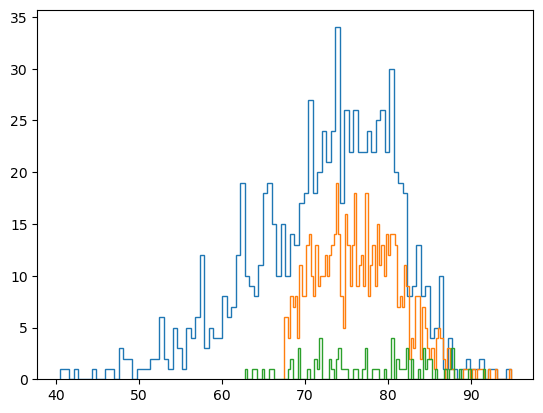

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

_, new_control = balance_control(AD, control, "current_scan_age")

plt.hist(control.current_scan_age, histtype="step", bins=100)
plt.hist(new_control.current_scan_age, histtype="step", bins=100)
plt.hist(AD.current_scan_age, histtype="step", bins=100)
plt.show()

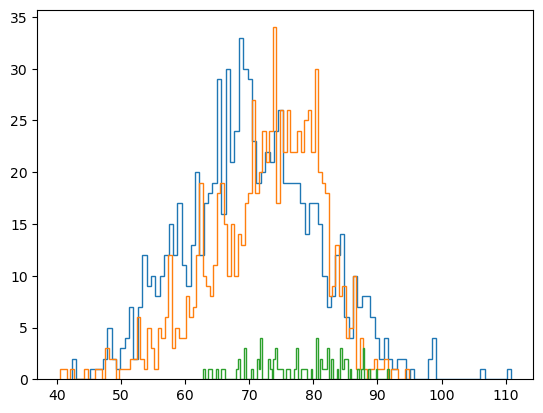

In [5]:
import numpy as np
rng = np.random.default_rng(seed=1234)

ages = rng.normal(loc=70, scale=10, size=len(control))

plt.hist(ages, bins=100, histtype="step")
plt.hist(control.current_scan_age, histtype="step", bins=100)
plt.hist(AD.current_scan_age, histtype="step", bins=100)
plt.show()

In [9]:
def p(s: pd.Series)->float:
    """

    Args:
        s (pd.Series): Series with two categories

    Returns:
        float: Proportion of first variable
    """
    vc = s.value_counts() / len(s)
    return vc.index[0], vc.values[0]



('Féminin', 0.6498353457738749)

In [12]:
AD.SEX.value_counts(sort=True)

SEX
Féminin     40
Masculin    33
Name: count, dtype: int64

In [7]:
from bold_dementia.data.study import balance_control_cat, p

balance_control_cat(
    AD,
    control,
    "SEX"
)

Féminin, new gap = -0.10150534397109745, 910 controls left
Féminin, new gap = -0.10111970101119705, 909 controls left
Féminin, new gap = -0.10073320861746426, 908 controls left
Féminin, new gap = -0.10034586398030543, 907 controls left
Féminin, new gap = -0.09995766427772235, 906 controls left


(                                            file_path  \
 0   /georges/memento/BIDS/derivatives/fmriprep-23....   
 1   /georges/memento/BIDS/derivatives/fmriprep-23....   
 2   /georges/memento/BIDS/derivatives/fmriprep-23....   
 5   /georges/memento/BIDS/derivatives/fmriprep-23....   
 6   /georges/memento/BIDS/derivatives/fmriprep-23....   
 ..                                                ...   
 87  /georges/memento/BIDS/derivatives/fmriprep-23....   
 88  /georges/memento/BIDS/derivatives/fmriprep-23....   
 90  /georges/memento/BIDS/derivatives/fmriprep-23....   
 92  /georges/memento/BIDS/derivatives/fmriprep-23....   
 93  /georges/memento/BIDS/derivatives/fmriprep-23....   
 
                                         file_basename file_tag file_type  \
 0   sub-0026_ses-M048_task-rest_space-MNI152NLin6A...     bold    nii.gz   
 1   sub-0071_ses-M048_task-rest_space-MNI152NLin6A...     bold    nii.gz   
 2   sub-0190_ses-M000_task-rest_space-MNI152NLin6A...     bold    nii.